<a href="https://colab.research.google.com/github/benku123/Statistics_Python/blob/main/hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
from scipy.stats import norm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chisquare

In [ ]:
n = 5000000
s=1250
m=98
confidence_level = 0.99

sp = m/s

standard_error = math.sqrt((sp*(1-sp))/s)
z=norm.ppf(1-(1-confidence_level)/2)

lower_bound = sp - z* standard_error
upper_bound = sp + z* standard_error

lower_bound = max(0,lower_bound)
upper_bound = max(0,upper_bound)

lower_bound_pop = lower_bound * n
upper_bound_pop = upper_bound * n

print("Sample proportion {:.4f}".format(sp))
print("Confidence interval (sample): [{:.4f},{:.4f}]".format(lower_bound,upper_bound))
print("Confidence interval (population of cracked list): [{:.2f},{:.2f}]".format(lower_bound_pop,upper_bound_pop))

Sample proportion 0.0784
Confidence interval (sample): [0.0588,0.0980]
Confidence interval (population of cracked list): [294082.27,489917.73]


Null hypothesis: 10% or more of the tiles are cracked
Sample proportion 0.0784
Sample error 0.0076
Z-score -2.8
p-value 0.0026
Reject the null hypoithesis


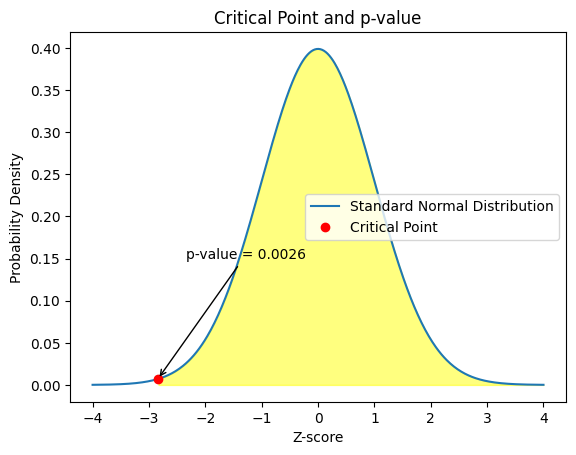

In [ ]:
null_proportion = 0.10
sample_proportion = m/s
standars_error = math.sqrt((null_proportion*(1-null_proportion))/s)
z_score = (sp-null_proportion) / standard_error
p_value = stats.norm.cdf(round(z_score,1))

print("Null hypothesis: 10% or more of the tiles are cracked")
print("Sample proportion {:.4f}".format(sample_proportion))
print("Sample error {:.4f}".format(standard_error))
print("Z-score {:.1f}".format(z_score))
print("p-value {:.4f}".format(p_value))

if p_value < 0.05:
  print("Reject the null hypoithesis")
else:
  print("Fail to reject the null hypothesis")
x = np.linspace(-4,4,500)
y= stats.norm.pdf(x,0,1)
fig,ax, = plt.subplots()
ax.plot(x,y,label='Standard Normal Distribution')
ax.fill_between(x,0,y,where=x >= z_score, color = 'yellow', alpha = 0.5)
ax.plot(z_score,stats.norm.pdf(z_score,0,1),'ro',label='Critical Point')
ax.set_xlabel('Z-score')
ax.set_ylabel('Probability Density')
ax.set_title('Critical Point and p-value')
ax.annotate('p-value = {:.4f}'.format(p_value),
            xy=(z_score,stats.norm.pdf(z_score,0,1)),
            xytext=(z_score + 0.5, 0.15),
            arrowprops = dict(facecolor='black', arrowstyle='->'))
ax.legend()
plt.show()

In [ ]:
dataset = [(0,3),(1,14),(2,20),(3,25),(4,14),(5,6),(6,2),(7,0),(8,1)]

lambda_val=3
expected_frequency = [math.exp(-lambda_val) * (lambda_val**error) / math.factorial(error) * sum([data[1] for data in dataset]) for error, _ in dataset]
data = {
    "Number of errors:": [data[0] for data in dataset],
    "Frequency": [data[1] for data in dataset],
    "Expected Call Frequency:": expected_frequency
}
df = pd.DataFrame(data)
print(df)

   Number of errors:  Frequency  Expected Call Frequency:
0                  0          3                  4.231901
1                  1         14                 12.695702
2                  2         20                 19.043554
3                  3         25                 19.043554
4                  4         14                 14.282665
5                  5          6                  8.569599
6                  6          2                  4.284800
7                  7          0                  1.836343
8                  8          1                  0.688629


In [ ]:
grouped_data = {
    'Group:':['0-1','2','3','4','5','6-8'],
    'Number of Error': [[0,1],[2],[3],[4],[5],[6,7,8]],
    'Frequency': [17,20,25,14,6,3],
    'Expected Cell Frequency': [16.927603,19.043554,19.043554,14.282665,8.569599,6.809772]
}

df_grouped = pd.DataFrame(grouped_data)
observed_freq = df_grouped['Frequency']
expected_freq = round(df_grouped['Expected Cell Frequency'])

In [ ]:
chi2,p_value = chisquare(f_obs = observed_freq,f_exp = expected_freq)

print("Pearson chi-square statistic:",chi2)
print("p-value:", p_value)

Pearson chi-square statistic: 5.233082706766917
p-value: 0.3881018358853547


In [ ]:
observed_absences = [23,16,14,19,28]
expected_abscences = [20,20,20,20,20]

chi2, p_value = stats.chisquare(observed_absences,expected_abscences)
degree_of_freedom = len(observed_absences)-1

significance_level = 0.05
if p_value < significance_level:
  print("Reject the null hypothesis: The days for highest number of abscences occur diffirently")
else:
  print("Fail to reject the null hypothesis")

print("Chi-square test statistics:",chi2)
print("p-value:",p_value)
print("Degrees of freedom:", degree_of_freedom)

Fail to reject the null hypothesis
Chi-square test statistics: 6.3
p-value: 0.1778363264982168
Degrees of freedom: 4
